## Turbine components sizing

In [1]:
from windisch import *
import numpy as np
import xarray as xr
import pandas as pd

In [2]:
tip = TurbinesInputParameters()
tip.static()
_, array = fill_xarray_from_input_parameters(
    tip,
    scope={"year": [2020, ],}
)
array = array.interp(size=np.linspace(100, 10000, 10), kwargs={"fill_value": "extrapolate"},)
fp = "era5_mean_2013-2022_month_by_hour_corrected.nc"
wt = WindTurbineModel(
    array,
    #location=(55.602164360115104, 12.491974627997108),
    wind_data=xr.open_dataset(fp),
    country="DK"
)
wt.set_all()

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_48026/2462297152.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Rated power vs. Rotor diameter')

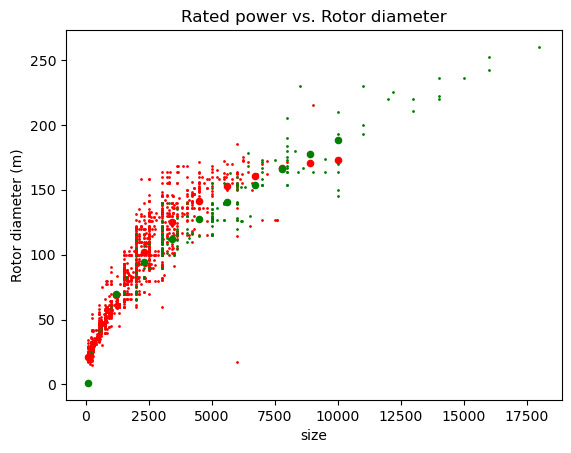

In [21]:
fp = "Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(subset="Rotor diameter", inplace=True)

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rated power", y="Rotor diameter", s=1, c='r')
wt.array.sel(
    parameter="rotor diameter",
    application="onshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='scatter', x='size', y='height', ax=ax, color="r"
)

ax = data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rated power", y="Rotor diameter", s=1, c='g', ax=ax)
wt.array.sel(
    parameter="rotor diameter",
    application="offshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='scatter', x='size', y='height', ax=ax, color="g"
)
ax.set_ylabel("Rotor diameter (m)")
ax.set_title("Rated power vs. Rotor diameter")

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_48751/3011188571.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Rated power vs. Hub height')

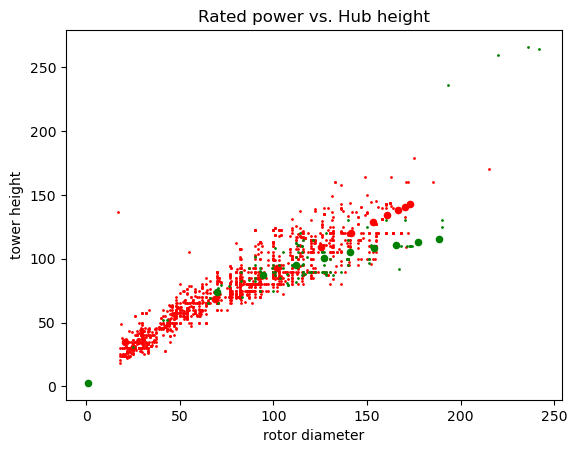

In [3]:
fp = "Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(
    subset=["Minimum hub height", "Maximum hub height"],
    how="all",
    inplace=True
)
data["hub height"] = data[["Minimum hub height", "Maximum hub height"]].mean(axis=1)

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rotor diameter", y="hub height", s=1, c='r')
wt.array.sel(
    parameter=["tower height", "rotor diameter"],
    application="onshore",
    year=2020,
    value=0
).to_dataframe("height").unstack()["height"].reset_index().plot(
    kind='scatter', x='rotor diameter', y='tower height', ax=ax, color="r"
)
data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rotor diameter", y="hub height", s=1, c='g', ax=ax)
wt.array.sel(
    parameter=["tower height", "rotor diameter"],
    application="offshore",
    year=2020,
    value=0
).to_dataframe("height").unstack()["height"].reset_index().plot(
    kind='scatter', x='rotor diameter', y='tower height', ax=ax, color="g"
)
ax.set_title("Rated power vs. Hub height")

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_48026/2555828091.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Rated power vs. Nacelle mass')

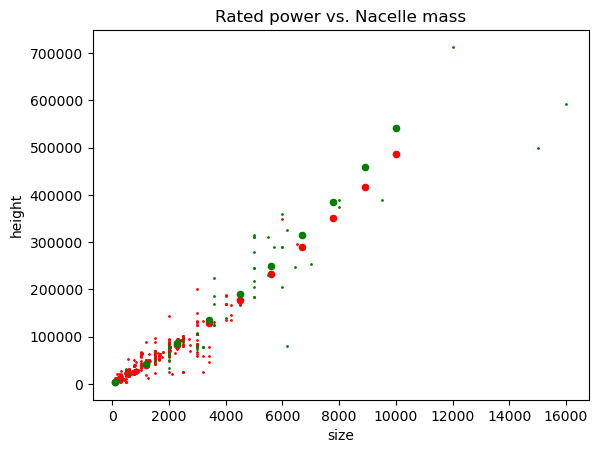

In [8]:
fp = "Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(subset="Nacelle weight", inplace=True)
data["Nacelle weight"] *= 1000


ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rated power", y="Nacelle weight", s=1, c='r')
wt.array.sel(
    parameter="nacelle mass",
    application="onshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='scatter', x='size', y='height', ax=ax, color="r"
)

ax = data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rated power", y="Nacelle weight", s=1, c='g', ax=ax)
wt.array.sel(
    parameter="nacelle mass",
    application="offshore",
    year=2020,
    value=0
).to_dataframe("height").reset_index().plot(
    kind='scatter', x='size', y='height', ax=ax, color="g"
)
ax.set_title("Rated power vs. Nacelle mass")

/var/folders/cn/pys1j9rn0y7djkhv3hfdtrs00000gn/T/ipykernel_48026/365516767.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace("#ND", np.nan, inplace=True)


Text(0.5, 1.0, 'Rotor diameter vs. Rotor mass')

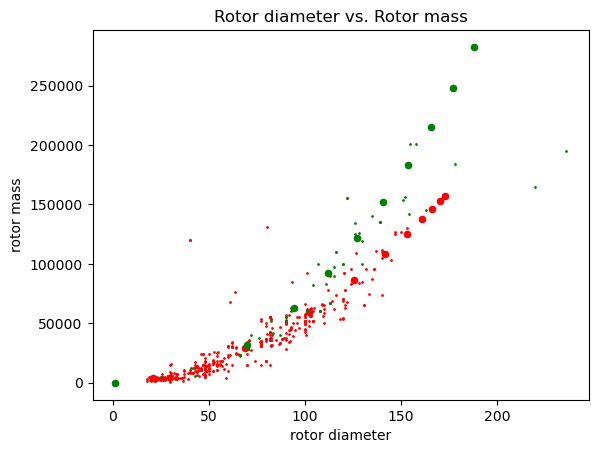

In [10]:
fp = "Turbines_20230629.xlsx"
data = pd.read_excel(fp, sheet_name="Turbines")
data = data.iloc[1:]
data.replace("#ND", np.nan, inplace=True)
data.dropna(subset="Rotor weight", inplace=True)
data["Rotor weight"] *= 1000

ax = data.loc[data["Offshore"]=="No"].plot.scatter(x="Rotor diameter", y="Rotor weight", s=1, c='r')
wt.array.sel(
    parameter=["rotor diameter", "rotor mass"],
    application="onshore",
    year=2020,
    value=0
).to_dataframe("x").reset_index().pivot(
    index=["size", "application", "year", "value"], columns="parameter", values="x"
).reset_index().plot(
    kind='scatter', x='rotor diameter', y='rotor mass', ax=ax, color="r"
)

data.loc[data["Offshore"]=="Yes"].plot.scatter(x="Rotor diameter", y="Rotor weight", s=1, c='g', ax=ax)
wt.array.sel(
    parameter=["rotor diameter", "rotor mass"],
    application="offshore",
    year=2020,
    value=0
).to_dataframe("x").reset_index().pivot(
    index=["size", "application", "year", "value"], columns="parameter", values="x"
).reset_index().plot(
    kind='scatter', x='rotor diameter', y='rotor mass', ax=ax, color="g"
)
ax.set_title("Rotor diameter vs. Rotor mass")